In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = "../data/train.csv" # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
N, D = tX.shape

In [3]:
labels = ["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt"]
def feature_label(i):
    return f"Feature {i} ({labels[i]})"

# Exploratory data analysis

Find out which data points are missing:

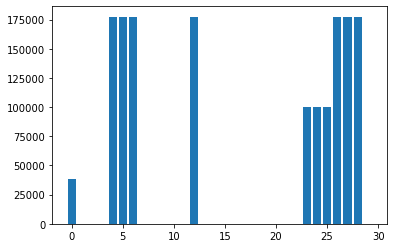

In [4]:
def valid_data(arr):
    return arr[arr != -999]
missing = tX == -999
plt.bar(np.arange(D), np.count_nonzero(missing, axis=0))
plt.show()

Some notes:
* DER_* features are computed from the PRI_* features. This probably means we should ignore the PRI_* features, since they would most likely directly correlate to the DER_* ones. Luckily, they're already in the right order: there's 13 DER_* variables followed by PRI_* ones.
* All variables are continuous except the prediction and PRI_jet_num, which we shouldn't care about anyways.

## Plot data features with respect to each other

In [7]:
def normalize(arr):
    return (arr - np.mean(arr)) / np.std(arr)

def correlate(feature1, feature2, size=None, axs=plt):
    valid = (feature1 != -999) & (feature2 != -999)
    feature1 = normalize(feature1[valid])
    feature2 = normalize(feature2[valid])
    if size is not None:
        perm = np.random.permutation(size)
        feature1 = feature1[perm]
        feature2 = feature2[perm]
    print(np.corrcoef(feature1, feature2))
    axs.scatter(feature1, feature2, s=1.5)

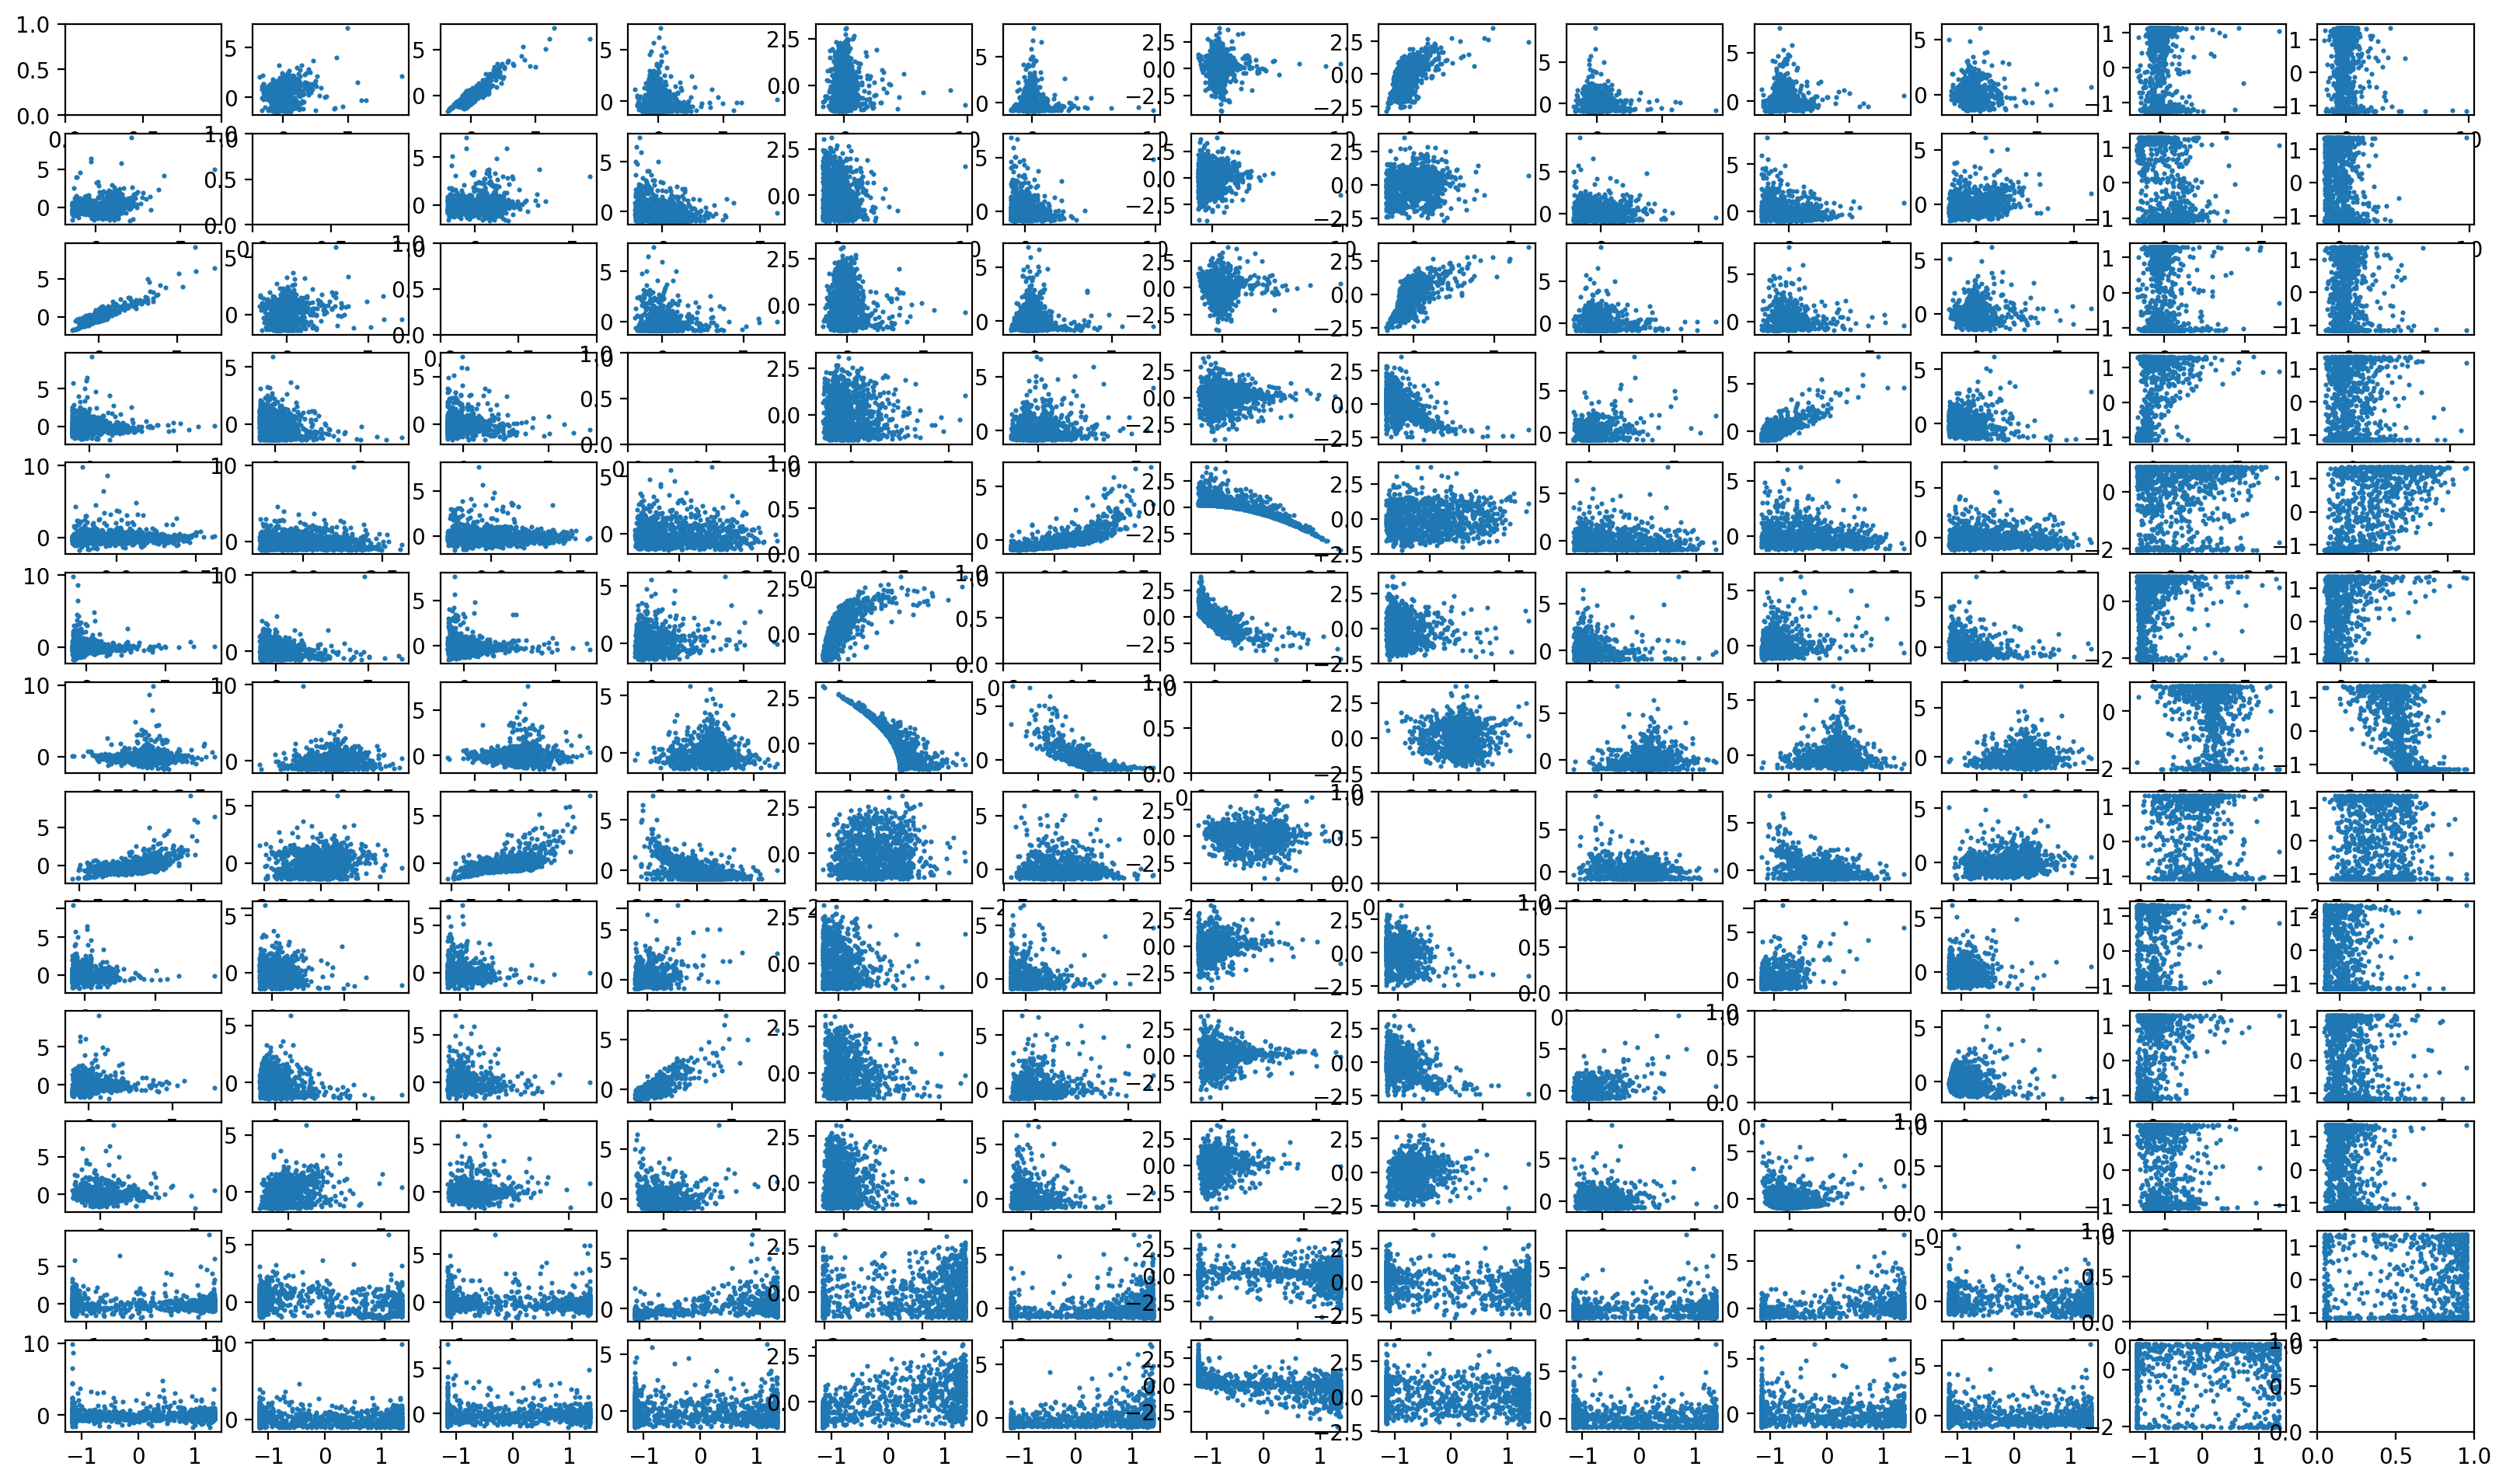

In [6]:
transposed = tX.T[:13]
fig = plt.figure(figsize=(20,12), dpi=200, facecolor='w', edgecolor='k')
axs = fig.subplots(13, 13)
for i, col1 in enumerate(transposed):
    for j, col2 in enumerate(transposed):
        if i != j:
            correlate(col1, col2, size=1000, axs=axs[i,j])
fig.savefig('corr.png')

# Notable correlation results

In [8]:
def correlate_features(i1, i2, size=None):
    plt.figure()
    plt.xlabel(feature_label(i1))
    plt.ylabel(feature_label(i2))
    correlate(tX[:,i1], tX[:,i2], size)

[[1.         0.91179511]
 [0.91179511 1.        ]]
[[ 1.         -0.83599277]
 [-0.83599277  1.        ]]
[[1.         0.79718078]
 [0.79718078 1.        ]]
[[1.         0.83273307]
 [0.83273307 1.        ]]


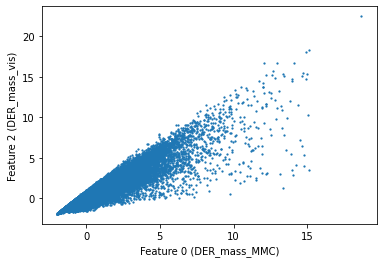

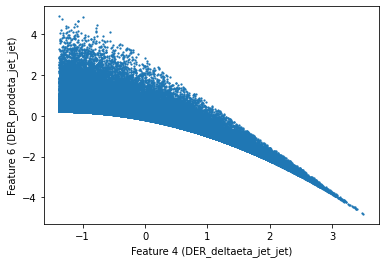

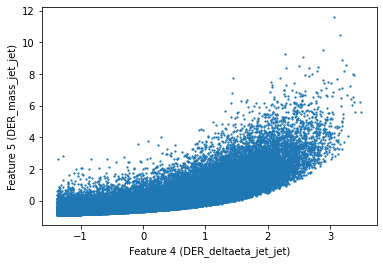

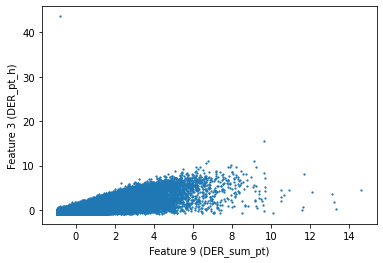

In [9]:
correlate_features(0, 2)
correlate_features(4, 6)
correlate_features(4, 5)
correlate_features(9, 3)

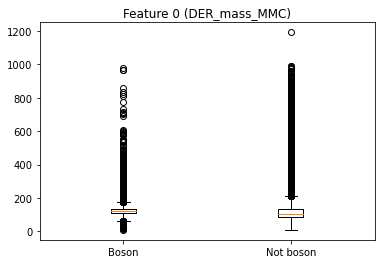

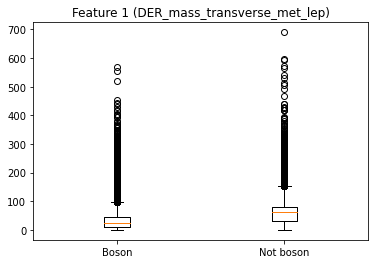

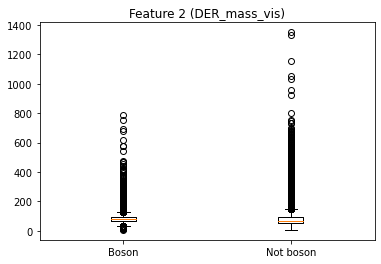

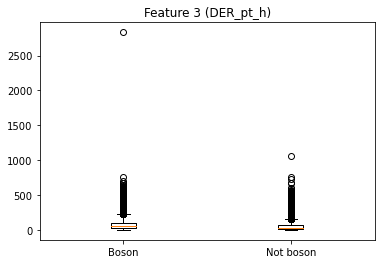

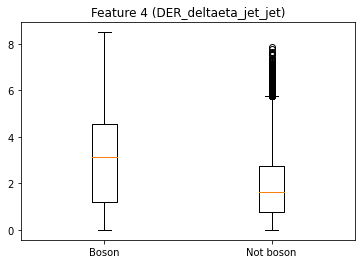

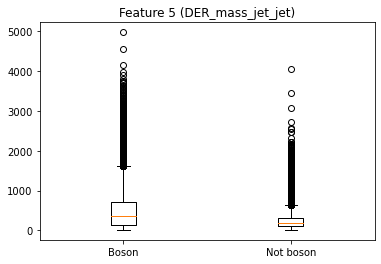

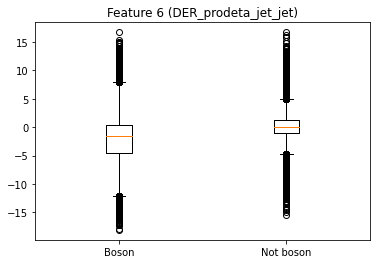

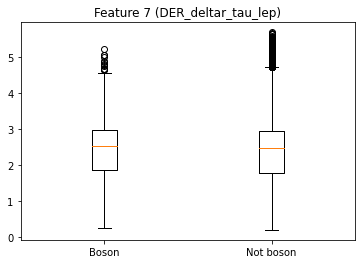

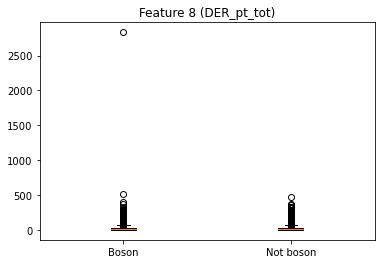

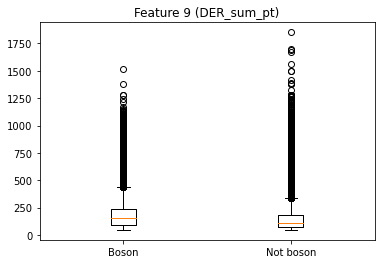

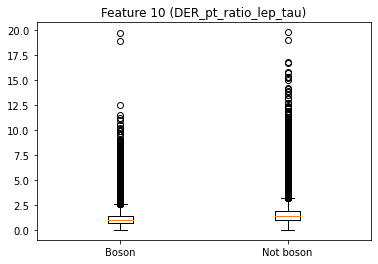

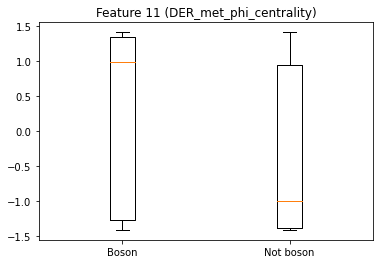

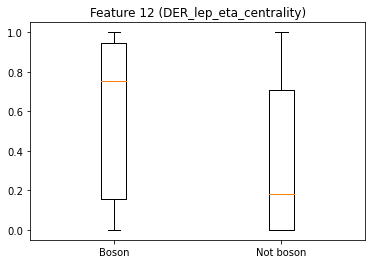

In [5]:
is_boson = y == 1
for i, col in enumerate(tX.T[:13]):
    boson, other = col[is_boson], col[~is_boson]
    plt.figure()
    plt.title(f"Feature {i} ({labels[i]})")
    plt.boxplot([boson[boson != -999], other[other != -999]], labels=["Boson", "Not boson"])

## Generate predictions and save ouput in csv format for submission:

In [4]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)